## Observations and Insights 

The study results indicate that the Capomulin drug regimen demonstrates positive effects on mouse tumor volume compared to alternatives. The tumor volume is shown to decrease over time in most subjects. The drugs Ramicane and Capomulin show greater number of timpoints over the length of the study, meaning that mice on these two drugs tended to survive the squamous cell carcinoma (SCC) for greater amounts of time.

The study was conducted with 50.4% male and 49.6% female mice. There were no statiscal outliers in the Ramicane nor Campomulin Drug regimens when examining final tumor volume at the end of the study period. 

There is a strong positive correlation amoung the Capomulin group between average tumor volume (mm3) and mouse weight (g). This may indicate that lighter individuals may be more susceptible to the drug's effects and that heavier individuals may need a higher dosage to see similar benefits.

All drugs in the study, except Ramicane and Capomulin, performed near to or worse than the placebo. This indicates these drugs should not be used for the treatment of SCC and only Ramicane and Capomulin would be acceptable to push to human trials.

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import os


In [109]:
# Study data files
mouse_metadata_path = os.path.join("data", "Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

mouse_study_df.head(10)
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [110]:
# Checking the number of unique mice in the dataset.
num_mice = mouse_study_df['Mouse ID'].nunique()
print(f"The number of unique mouse IDs is: {num_mice} (including duplicates)")

The number of unique mouse IDs is: 249 (including duplicates)


In [111]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Returns the subset of Mouse IDs that have matching 'Mouse ID' and 'Timepoint' across the dataset
mouse_study_df['Mouse ID'][mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [112]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df['Mouse ID']=='g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df.drop(labels = mouse_study_df.loc[mouse_study_df['Mouse ID']=='g989'].index, inplace =False)

# check to ensure duplicated mouse id is removed.
if clean_mouse_study_df[clean_mouse_study_df['Mouse ID']=='g989']['Mouse ID'].any() == False:
    print("Mouse ID g989 has been removed from dataset")
else:
    print("oops, mouse ID g989 is still in the dataframe")

Mouse ID g989 has been removed from dataset


In [114]:
# Checking the number of mice in the clean DataFrame.
no_dup_num_mice = clean_mouse_study_df["Mouse ID"].nunique()
print(f"The number of mouse IDs is: {no_dup_num_mice} (duplicates REMOVED)")

The number of mouse IDs is: 248 (duplicates REMOVED)


## Summary Statistics

In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mouse_study_group = clean_mouse_study_df.groupby(['Drug Regimen'])

means = mouse_study_group['Tumor Volume (mm3)'].mean()
medians = mouse_study_group['Tumor Volume (mm3)'].median()
variances = mouse_study_group['Tumor Volume (mm3)'].var()
std_devs = mouse_study_group['Tumor Volume (mm3)'].std()
sems = mouse_study_group['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.
tumor_vol_sum_table = pd.DataFrame({
    'Mean Tumor Volume (mm3)': means,
    'Median Tumor Volume (mm3)': medians,
    'Variance': variances,
    'Standard Deviation': std_devs,
    'SEM': sems
})

# Display tumor volume summary table in ascending order based on mean tumor volume
tumor_vol_sum_table.sort_values(by='Mean Tumor Volume (mm3)', ascending = True)


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_vol_sum_table = mouse_study_group.agg(Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'), Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'), Variance=('Tumor Volume (mm3)', 'var'), Std_dev=('Tumor Volume (mm3)', 'std'), SEM = ('Tumor Volume (mm3)', 'sem'))

# Display tumor volume summary table in ascending order based on mean tumor volume
agg_tumor_vol_sum_table.sort_values(by='Mean_Tumor_Volume', ascending=True)


,Mean_Tumor_Volume,Median_Tumor_Volume,Variance,Std_dev,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

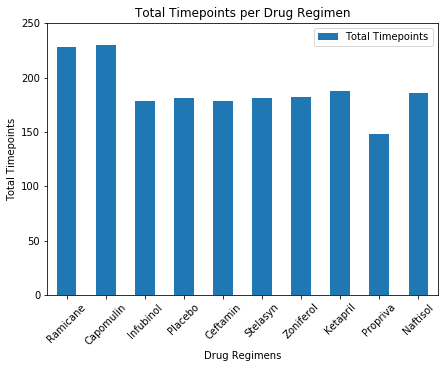

In [117]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Gather all unique drug regimen names
drug_names = clean_mouse_study_df['Drug Regimen'].unique()

# Generate list of total time points for each drug regimen
total_timepoints = [clean_mouse_study_df[clean_mouse_study_df['Drug Regimen'] == drug]['Timepoint'].count() for drug in drug_names]

# append drug names and timepoints into single dataframe.
timestamps= pd.DataFrame({
    'Drug Regimens': drug_names,
    'Total Timepoints': total_timepoints
})

# plot timepoints per drug regimen using pandas
ax = timestamps.plot(kind='bar',x='Drug Regimens', y='Total Timepoints', rot=45, figsize=(7,5))
ax.set_ylim(0,250)
ax.set_ylabel('Total Timepoints')
ax.set_title("Total Timepoints per Drug Regimen")
plt.show()

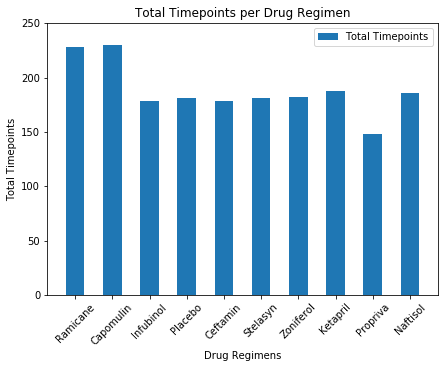

In [118]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# create x axis values as numpy array 
x_axis = np.arange(len(drug_names))

# convert numpy array x axis into a standard list for set_xticks
tick_locations = [val for val in x_axis]

# Generate figure and axis
fig, ax = plt.subplots(1,1, figsize=(7,5))

# plot bar plot on axis for total timepoints per drug regimen
ax.bar(x=x_axis, height=total_timepoints, align='center', width=0.5, alpha=1)

# configure x-axis
ax.set_xticks(tick_locations)
ax.set_xticklabels(drug_names, rotation= 45)
ax.set_xlim(-0.75, len(x_axis)-0.25)
ax.set_xlabel("Drug Regimens")

# configure y-axis
ax.set_ylim(0, 250)
ax.set_ylabel("Total Timepoints")

# configure title and legend
ax.set_title("Total Timepoints per Drug Regimen")
ax.legend(['Total Timepoints'], loc='best')

plt.show()

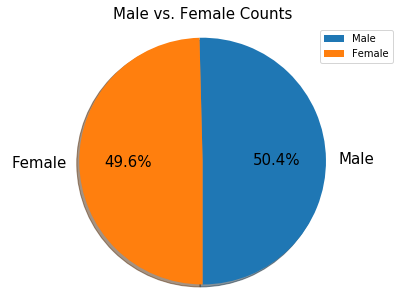

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Gather number of males and females in the study
males_count = clean_mouse_study_df[clean_mouse_study_df['Sex']=='Male']['Mouse ID'].nunique()
females_count = clean_mouse_study_df[clean_mouse_study_df['Sex']=='Female']['Mouse ID'].nunique()

# create new dataframe with counts to plot using pandas
sex_df = pd.DataFrame({
    'Count': [males_count, females_count]
}, index=['Male', 'Female'])

# plot pie chart using pandas
sex_df.plot(kind='pie', y='Count', autopct="%1.1f%%", shadow=True, figsize=(7,5), fontsize=15, startangle=270)

# format pie chart
plt.ylabel('')
plt.title("Male vs. Female Counts", fontsize = 15)
plt.axis('equal')
plt.show()

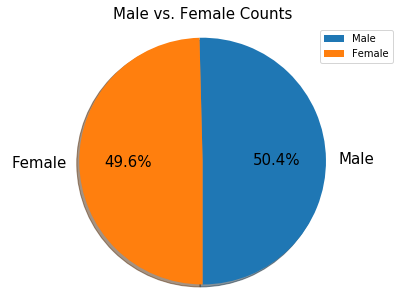

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# create labels for pie chart and male/female total counts
labels = ['Male', 'Female']
counts = [males_count, females_count]

# generate figure and axis
fig, ax = plt.subplots(1,1, figsize = (7,5))

# plot pie chart onto axis
ax.pie(counts, labels = labels, autopct='%1.1f%%', shadow =True, textprops={'fontsize': 15}, startangle=270)

# format pie chart
ax.set_title("Male vs. Female Counts", fontsize=15)
ax.legend(labels)
ax.axis('equal')


plt.show()

## Quartiles, Outliers and Boxplots

In [121]:
# Generate list of drugs with possible positive effects
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# filter study data to only inlcude drugs: 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'
positive_regimens_df = clean_mouse_study_df[clean_mouse_study_df['Drug Regimen'].isin(drug_regimens)]

# drop duplicate mouse IDs and only keep the last row in which they appear. This corresponds to the final timpoint measured for each mouse
# The remaining rows hold the final tumor volume
positive_regimens_df = positive_regimens_df.drop_duplicates(subset='Mouse ID', keep='last')

# rename Tumor Volume to Final Tumor Volume for clarity
positive_regimens_df = positive_regimens_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})

positive_regimens_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [122]:
# Put treatments into a list for for loop (and later for plot labels.
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
 
# Create outliers summary dataframe to display information
outliers_df = pd.DataFrame({
    'Drug Regimen': [],
    'Lower Quartile': [],
    'Upper Quartile': [],
    'IQR': [], 
    'Lower Bound': [], 
    'Upper Bound': [],
    'Number of Outliers': []
})

# Loop through each drug in the drug regimens with possible positive effects: 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'
for drug in drug_regimens:
    
    # calculate quartiles for each drug
    quartiles = positive_regimens_df[positive_regimens_df['Drug Regimen']==drug]['Final Tumor Volume (mm3)'].quantile([.25, .5, .75])
    
    # lower and upper (first and third) quartiles
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # calculate IQR
    iqr = upperq - lowerq
    
    # Determine upper and lower outlier bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # return series of mouse IDs that are determined to be outliers for each Drug
    outlier_series = positive_regimens_df[(positive_regimens_df['Final Tumor Volume (mm3)'] < lower_bound) | (positive_regimens_df['Final Tumor Volume (mm3)'] > upper_bound)][positive_regimens_df['Drug Regimen']==drug]['Mouse ID']

    # Append summary distribution statistics to outliers df
    outliers_df = outliers_df.append({
        'Drug Regimen': drug,
        'Lower Quartile': lowerq,
        'Upper Quartile': upperq,
        'IQR': iqr, 
        'Lower Bound': lower_bound, 
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outlier_series)
        }, ignore_index=True)

# set index to Drug regimen
outliers_df = outliers_df.set_index('Drug Regimen')

print("The mice treated with Capomulin, Ramicane, and Ceftamin do not contain any outliers defined with the 1.5IQR standard.")

print("The Drug Infubinol has one outlier at Mouse ID: c326")

outliers_df


    

The mice treated with Capomulin, Ramicane, and Ceftamin do not contain any outliers defined with the 1.5IQR standard.
The Drug Infubinol has one outlier at Mouse ID: c326


/Users/jaketrevithick/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound,Number of Outliers
Drug Regimen,,,,,,
Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,0.0
Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811,0.0
Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,1.0
Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,0.0


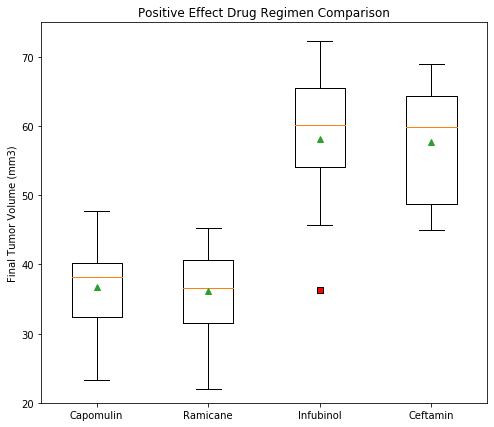

In [123]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# create empty list to hold tumor volume datasets
data = []

# loop through each drug regimen and gather the Final tumor volume for each mouse
for drug in drug_regimens:
    
    tumor_vol_data = positive_regimens_df[positive_regimens_df['Drug Regimen']==drug]['Final Tumor Volume (mm3)']
    data.append(tumor_vol_data)

# create figure and axis
fig, ax = plt.subplots(1,1, figsize = (8,7))

# format outliers
red_square = dict(markerfacecolor = 'red', marker='s')

# plot box and whisker plot for each drug on single plot
ax.boxplot(data, labels=drug_regimens, flierprops=red_square, showmeans=True)

# formate y-axis and title
ax.set_ylim(20, 75)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Positive Effect Drug Regimen Comparison')


plt.show()



## Line and Scatter Plots

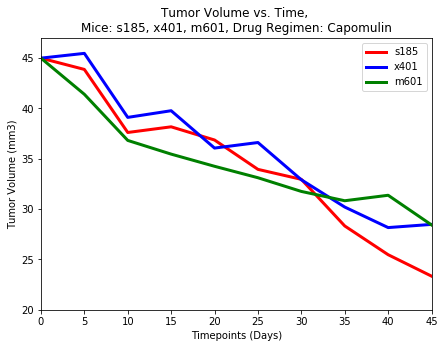

In [124]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# USED THREE MICE INSTEAD OF ONE MOUSE TO BETTER ILLUSTRATE TRENDS

# Grab first three mouse ids for mice treated with capomulin
mouse_ids = [clean_mouse_study_df[clean_mouse_study_df['Drug Regimen']=='Capomulin']['Mouse ID'].unique()[i] for i in range(3)]

# grab timpoints and tumor volumes as x and y values to be plotted
x_values = [clean_mouse_study_df[clean_mouse_study_df['Mouse ID']==mouse_id]['Timepoint'] for mouse_id in mouse_ids]
y_values = [clean_mouse_study_df[clean_mouse_study_df['Mouse ID']==mouse_id]['Tumor Volume (mm3)'] for mouse_id in mouse_ids]

# generate figure and axis
fig, ax = plt.subplots(1,1, figsize = (7,5))
colors = ['red', 'blue', 'green']

# plot tumor volume vs. timpoints for mouse ID: s185. x401, m601
for j in range(len(mouse_ids)):
    ax.plot(x_values[j], y_values[j], lw=3, color = colors[j])


# format x-axis
ax.set_xlabel('Timepoints (Days)')
ax.set_xlim(0,45)

# format y-axis
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_ylim(20, 47)

# set title
ax.set_title(f"Tumor Volume vs. Time, \nMice: {mouse_ids[0]}, {mouse_ids[1]}, {mouse_ids[2]}, Drug Regimen: Capomulin")
ax.legend(mouse_ids)

plt.show()

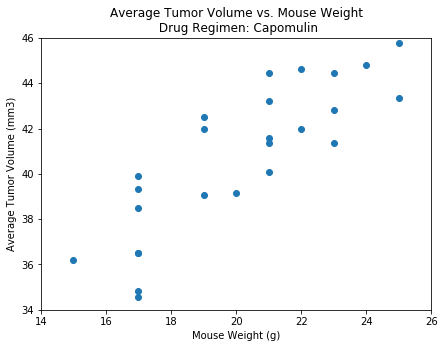

In [125]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# create new df of only mice treated with capomulin and groupby the Mouse IDs
capomulin_df = clean_mouse_study_df[clean_mouse_study_df['Drug Regimen']=='Capomulin']
cap_group = capomulin_df.groupby(['Mouse ID'])

# grab the average tumor volume and weight for each mouse
avg_tumor_vols = cap_group['Tumor Volume (mm3)'].mean()
weights = cap_group['Weight (g)'].mean()

# create figure and axis
fig, ax = plt.subplots(1,1, figsize=(7,5))

# scatter plot of average tumor volumes vs. mouse weight
ax.scatter(x=weights, y=avg_tumor_vols)

# format x-axis
ax.set_xlabel("Mouse Weight (g)")
ax.set_xlim(14,26, 2)

# format y-axis
ax.set_ylabel("Average Tumor Volume (mm3)")
ax.set_ylim(34, 46, 2)

# set title of the plot
ax.set_title("Average Tumor Volume vs. Mouse Weight\n Drug Regimen: Capomulin")

plt.show()


## Correlation and Regression

 Pearson r correlation coefficient between the Average Tumor Volume and Mouse Weight: 0.842


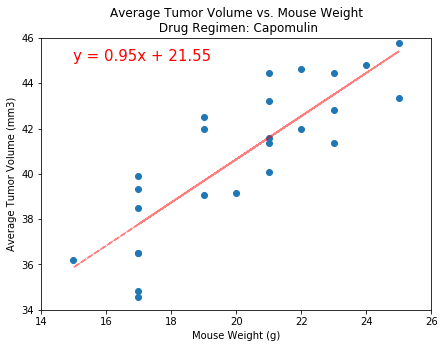

In [126]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# generate linear regression model parameters from average tumor volume and weights
avg_tum_slope, avg_tum_int, avg_tum_r, avg_tum_p, avg_tum_stderr = st.linregress(weights, avg_tumor_vols)

# create fit line
avg_tum_fit = avg_tum_slope * weights + avg_tum_int

# calculate correlation between weight and average tumor volume
weight_tum_corr = st.pearsonr(weights, avg_tumor_vols)[0]

# create figure and axis
fig, ax = plt.subplots(1,1, figsize=(7,5))

# plot scatter plot and linear regression fit line on same plot
ax.scatter(x=weights, y=avg_tumor_vols)
ax.plot(weights, avg_tum_fit, "--", color = 'red', alpha = 0.5)

# add line equation to figure
ax.text(15, 45, f"y = {round(avg_tum_slope, 2)}x + {round(avg_tum_int, 2)}", color='red', fontsize = 15)

# format x-axis
ax.set_xlabel("Mouse Weight (g)")
ax.set_xlim(14,26, 2)

# format y-axis
ax.set_ylabel("Average Tumor Volume (mm3)")
ax.set_ylim(34, 46, 2)

# set title
ax.set_title("Average Tumor Volume vs. Mouse Weight\n Drug Regimen: Capomulin")

print(f" Pearson r correlation coefficient between the Average Tumor Volume and Mouse Weight: {round(weight_tum_corr, 3)}")

plt.show()
